In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("RNN_initial_results/RNN_slowest_history.npz", allow_pickle=True)
RNN_slowest = data["history"][0]
data = np.load("RNN_initial_results/RNN_medium_history.npz", allow_pickle=True)
RNN_medium = data["history"][0]
data = np.load("RNN_initial_results/RNN_fastest_history.npz", allow_pickle=True)
RNN_fastest = data["history"][0]
data = np.load("RNN_initial_results/RNN_combined_history.npz", allow_pickle=True)
RNN_combined = data["history"][0]

data = np.load("GRU_initial_results/GRU_slowest_history.npz", allow_pickle=True)
GRU_slowest = data["history"][0]
data = np.load("GRU_initial_results/GRU_medium_history.npz", allow_pickle=True)
GRU_medium = data["history"][0]
data = np.load("GRU_initial_results/GRU_fastest_history.npz", allow_pickle=True)
GRU_fastest = data["history"][0]
data = np.load("GRU_initial_results/GRU_combined_history.npz", allow_pickle=True)
GRU_combined = data["history"][0]

In [12]:
data = np.load("PCA/PCA_5_RNN_history.npz", allow_pickle=True)
RNN_PCA_5 = data["history"][0]
data = np.load("PCA/PCA_10_RNN_history.npz", allow_pickle=True)
RNN_PCA_10 = data["history"][0]
data = np.load("PCA/PCA_15_RNN_history.npz", allow_pickle=True)
RNN_PCA_15 = data["history"][0]

data = np.load("PCA/PCA_5_GRU_history.npz", allow_pickle=True)
GRU_PCA_5 = data["history"][0]
data = np.load("PCA/PCA_10_GRU_history.npz", allow_pickle=True)
GRU_PCA_10 = data["history"][0]
data = np.load("PCA/PCA_15_GRU_history.npz", allow_pickle=True)
GRU_PCA_15 = data["history"][0]

In [15]:
data = np.load("FeatureSelection/Thigh_RNN_history.npz", allow_pickle=True)
RNN_Thigh = data["history"][0]
data = np.load("FeatureSelection/ThighQuats_RNN_history.npz", allow_pickle=True)
RNN_ThighQuats = data["history"][0]
data = np.load("FeatureSelection/ThighQuatsAccs_RNN_history.npz", allow_pickle=True)
RNN_ThighQuatsAccs = data["history"][0]
data = np.load("FeatureSelection/ThighQuatsGyros_RNN_history.npz", allow_pickle=True)
RNN_ThighQuatsGyros = data["history"][0]

data = np.load("FeatureSelection/Thigh_GRU_history.npz", allow_pickle=True)
GRU_Thigh = data["history"][0]
data = np.load("FeatureSelection/ThighQuats_GRU_history.npz", allow_pickle=True)
GRU_ThighQuats = data["history"][0]
data = np.load("FeatureSelection/ThighQuatsAccs_GRU_history.npz", allow_pickle=True)
GRU_ThighQuatsAccs = data["history"][0]
data = np.load("FeatureSelection/ThighQuatsGyros_GRU_history.npz", allow_pickle=True)
GRU_ThighQuatsGyros = data["history"][0]

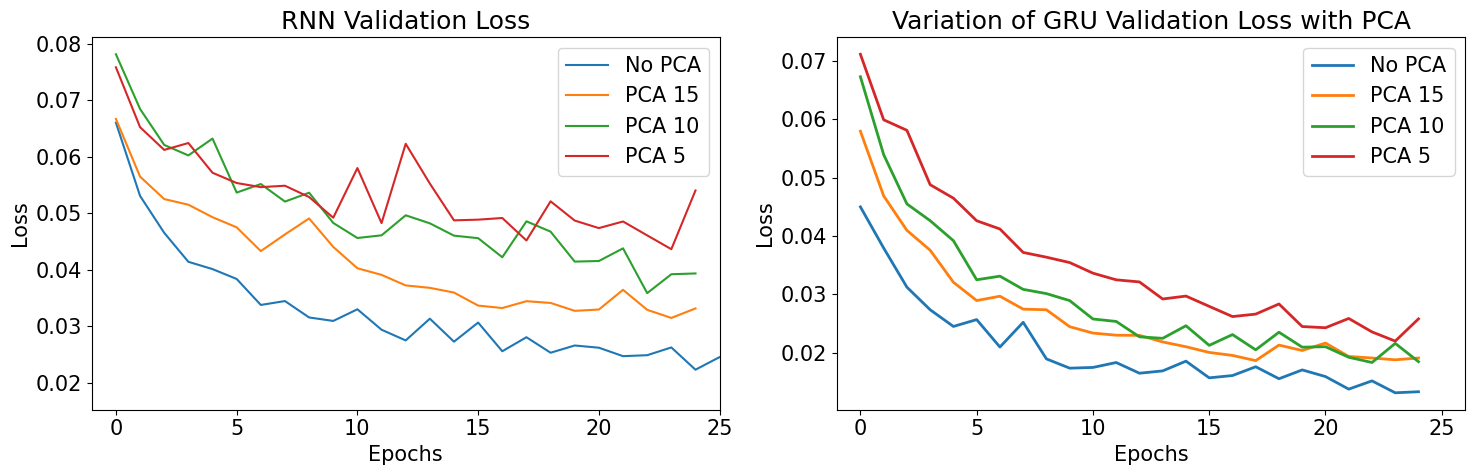

In [33]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(RNN_combined['history']['val_loss'], label='No PCA')
plt.plot(RNN_PCA_15['val_loss'], label='PCA 15')
plt.plot(RNN_PCA_10['val_loss'], label='PCA 10')
plt.plot(RNN_PCA_5['val_loss'], label='PCA 5')
plt.title('RNN Validation Loss')
plt.xlim(-1, 25)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(122)
plt.plot(GRU_combined['history']['val_loss'][:25], lw=2, label='No PCA')
plt.plot(GRU_PCA_15['val_loss'], lw=2, label='PCA 15')
plt.plot(GRU_PCA_10['val_loss'], lw=2, label='PCA 10')
plt.plot(GRU_PCA_5['val_loss'], lw=2, label='PCA 5')
plt.title('Variation of GRU Validation Loss with PCA')
plt.xlim(-1, 26)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

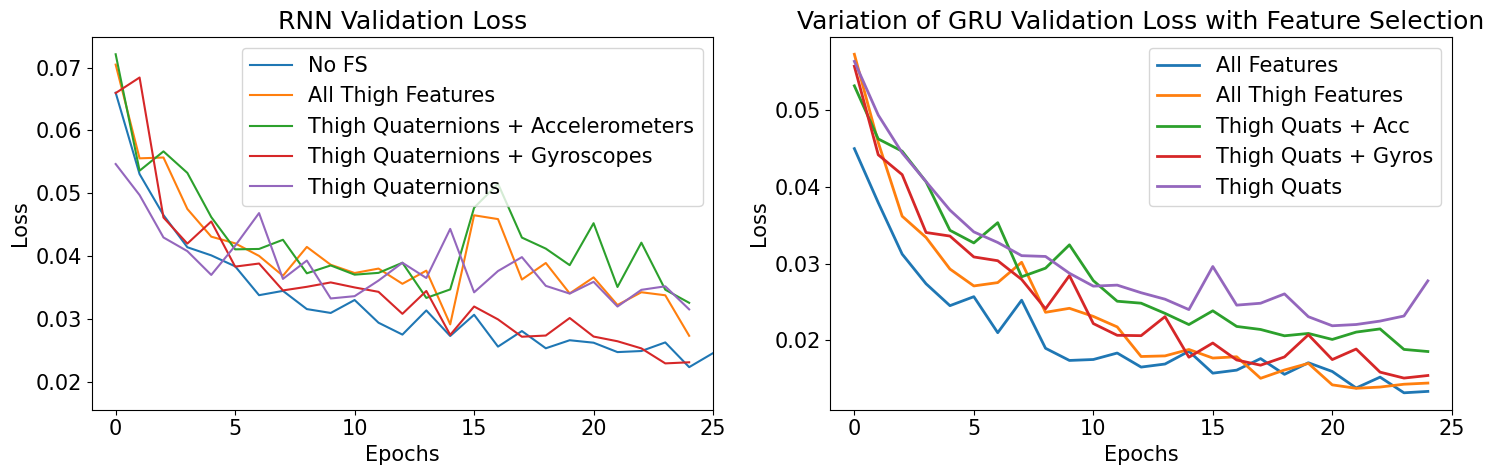

In [46]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(RNN_combined['history']['val_loss'], label='No FS')
plt.plot(RNN_Thigh['val_loss'], label='All Thigh Features')
plt.plot(RNN_ThighQuatsAccs['val_loss'], label='Thigh Quaternions + Accelerometers')
plt.plot(RNN_ThighQuatsGyros['val_loss'], label='Thigh Quaternions + Gyroscopes')
plt.plot(RNN_ThighQuats['val_loss'], label='Thigh Quaternions')
plt.title('RNN Validation Loss')
plt.xlim(-1, 25)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(122)
plt.plot(GRU_combined['history']['val_loss'][:25], lw=2, label=f'All Features')
plt.plot(GRU_Thigh['val_loss'], lw=2, label='All Thigh Features')
plt.plot(GRU_ThighQuatsAccs['val_loss'], lw=2, label='Thigh Quats + Acc')
plt.plot(GRU_ThighQuatsGyros['val_loss'], lw=2, label='Thigh Quats + Gyros')
plt.plot(GRU_ThighQuats['val_loss'], lw=2, label='Thigh Quats')
plt.title('Variation of GRU Validation Loss with Feature Selection')
plt.xlim(-1, 25)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

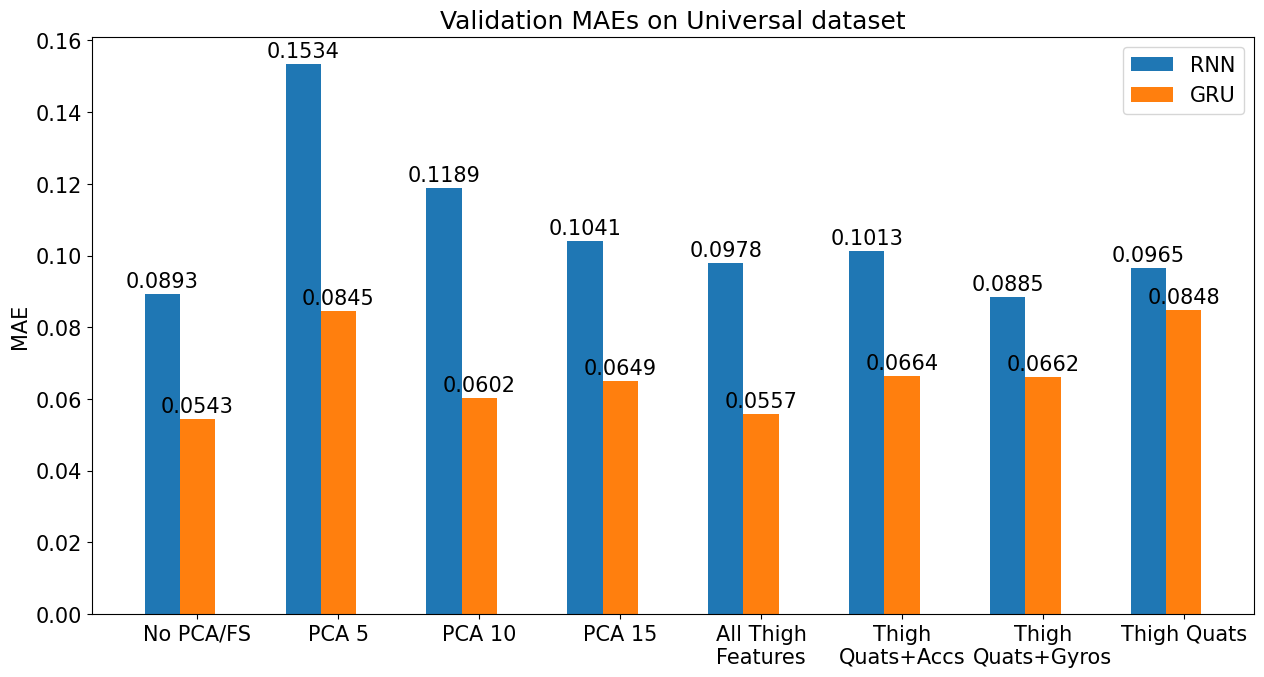

In [55]:
keys = ['No PCA/FS', 'PCA 5', 'PCA 10', 'PCA 15', 'All Thigh\nFeatures', 'Thigh\nQuats+Accs', 'Thigh\nQuats+Gyros', 'Thigh Quats']
x_axis = np.arange(len(keys))

rnn_vals = [RNN_combined['history']['val_mae'][24:25][0], RNN_PCA_5['val_mae'][24:25][0], RNN_PCA_10['val_mae'][24:25][0], RNN_PCA_15['val_mae'][24:25][0], RNN_Thigh['val_mae'][24:25][0], RNN_ThighQuatsAccs['val_mae'][24:25][0], RNN_ThighQuatsGyros['val_mae'][24:25][0], RNN_ThighQuats['val_mae'][24:25][0]]
gru_vals = [GRU_combined['history']['val_mae'][24:25][0], GRU_PCA_5['val_mae'][24:25][0], GRU_PCA_10['val_mae'][24:25][0], GRU_PCA_15['val_mae'][24:25][0], GRU_Thigh['val_mae'][24:25][0], GRU_ThighQuatsAccs['val_mae'][24:25][0], GRU_ThighQuatsGyros['val_mae'][24:25][0], GRU_ThighQuats['val_mae'][24:25][0]]

y_axis = {'RNN': rnn_vals, 'GRU': gru_vals}

bar_width = 0.25
multiplier = 0

plt.figure(figsize=(15, 7.5))
ax = plt.axes()

for algo, mae in y_axis.items():
    offset = bar_width * multiplier
    rects = ax.bar(x_axis + offset, np.round(mae, 4), bar_width, label=algo)
    ax.bar_label(rects, padding=2)
    multiplier += 1

ax.set_ylabel('MAE')
ax.set_title('Validation MAEs on Universal dataset')
ax.set_xticks(x_axis + bar_width, keys)
ax.legend(loc='upper right')

plt.show()